# Neural Network classification

In [704]:
import sklearn

In [705]:
from sklearn.datasets import make_circles

# make a sample
n_samples = 1000

# create a circle
X,y = make_circles(n_samples=n_samples, 
                   noise = 0.03, 
                   random_state=42)

In [706]:
X.shape, y.shape

((1000, 2), (1000,))

In [707]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [708]:
import pandas as pd

circles = pd.DataFrame({ "X1" : X[:,0] ,
                        "X2" : X[:,1],
                        "label" :  y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


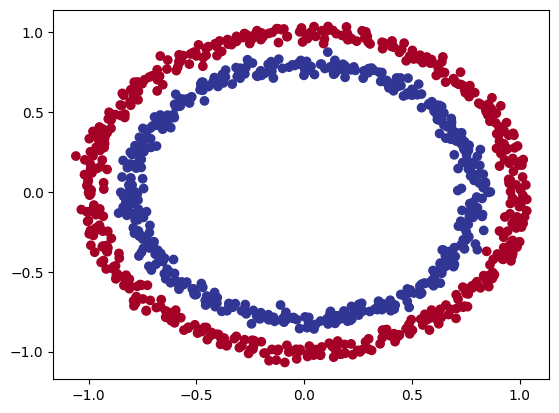

In [709]:
## visualizeing the circle
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu);

## check input shape and output shape

In [710]:
X.shape, y.shape

((1000, 2), (1000,))

In [711]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [712]:
## view the first example of featuer and labels
X_sample = X[0]
y_sample = y[0]

print(X_sample, X_sample.shape)
print(y_sample, y_sample.shape)
print(type(X_sample), type(y_sample))

[0.75424625 0.23148074] (2,)
1 ()
<class 'numpy.ndarray'> <class 'numpy.int64'>


In [713]:
import torch
import numpy as np
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [714]:
type(X), type(y) , X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [715]:
## split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [716]:
n_samples, len(X_train), len(X_test), len(y_train), len(y_test)

(1000, 800, 200, 800, 200)

## Build a model

To classify out blue and red dots

STEPS:
1. Setup the device
2. Construct a model
3. Define a loss function and optimizer
4. Create a training and test loop

In [717]:
## import torch
import torch.nn as nn

## seting up the device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [718]:
## building a neural network

class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)
    

    def forward(self, x):
        return self.layer2(self.layer1).to(device)


model = CircleModel().to(device)
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [719]:
## replace the model above with n.. sequential
class CircleModelSeq(nn.Module):
    def __init__(self):
        super().__init__()

        self.two_layer = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features= 5, out_features=1)
        )
    
    def forward(self,x):
        return self.two_layer(x)


model_0 = CircleModelSeq().to(device)
model_0

CircleModelSeq(
  (two_layer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [720]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer2.bias', tensor([-0.2060], device='cuda:0'))])

In [721]:
model_0.state_dict()

OrderedDict([('two_layer.0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('two_layer.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('two_layer.1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('two_layer.1.bias', tensor([-0.1213], device='cuda:0'))])

In [722]:
with torch.inference_mode():
    untrained_pred = model_0(X_test.to(device))

print(f"Length of prediction {len(untrained_pred)} , Shape : {untrained_pred.shape}")
print(f"Length of test sample {len(X_test)} : shape {X_test.shape}")
print(f"\nFirst 10 predictoin {untrained_pred[:10]}")
print(f"\nFirst 10 test sample {y_test[:10]}")


Length of prediction 200 , Shape : torch.Size([200, 1])
Length of test sample 200 : shape torch.Size([200, 2])

First 10 predictoin tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 test sample tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [723]:
## setup loss and optimizer

## loss function
loss_fn = nn.BCEWithLogitsLoss()

## optmizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [724]:
model_0.state_dict()

OrderedDict([('two_layer.0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('two_layer.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('two_layer.1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('two_layer.1.bias', tensor([-0.1213], device='cuda:0'))])

In [725]:
## calcualte accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## Training model  
1. Forward pass
2. clacualte the loss
3. optmizer zero grad
4. Loss backward
5. optimzer step


### 3.1 Going frm raw logits -> predictoin probabilites (by passing through activation function) -> prediction labels ( by `rounding` or `argmax`)

In [726]:
# view the first 5 output of the forwars pass on the text data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [727]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [728]:
y_logits_prob = torch.sigmoid(y_logits)
y_pred = torch.round(y_logits_prob)
y_pred.squeeze()

tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [729]:
## above code in one line
## raw logits -> probabiliy precition -> prediction labels

y_preds = torch.round(torch.sigmoid(model_0(X_test[:5].to(device))))
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

### 3.2 train and testing loop

In [730]:

torch.cuda.manual_seed(42)
torch.manual_seed(42)
epochs = 100
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,y_train)

    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} Loss : {loss:.5f} Accuracy : {acc:.2f}| Test loss : {test_loss:.5f} Test acc : {test_acc:.2f}")
    


    

Epoch : 0 Loss : 0.69796 Accuracy : 51.88| Test loss : 0.69440 Test acc : 58.00
Epoch : 10 Loss : 0.69590 Accuracy : 51.25| Test loss : 0.69305 Test acc : 53.00
Epoch : 20 Loss : 0.69490 Accuracy : 51.62| Test loss : 0.69254 Test acc : 49.50
Epoch : 30 Loss : 0.69435 Accuracy : 51.12| Test loss : 0.69236 Test acc : 49.50
Epoch : 40 Loss : 0.69401 Accuracy : 50.88| Test loss : 0.69232 Test acc : 51.00
Epoch : 50 Loss : 0.69378 Accuracy : 50.25| Test loss : 0.69234 Test acc : 50.00
Epoch : 60 Loss : 0.69362 Accuracy : 50.00| Test loss : 0.69239 Test acc : 51.50
Epoch : 70 Loss : 0.69351 Accuracy : 50.25| Test loss : 0.69246 Test acc : 51.00
Epoch : 80 Loss : 0.69342 Accuracy : 49.88| Test loss : 0.69254 Test acc : 50.00
Epoch : 90 Loss : 0.69336 Accuracy : 49.88| Test loss : 0.69262 Test acc : 53.00


In [731]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer2.bias', tensor([-0.2060], device='cuda:0'))])

In [732]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [733]:
# Plot decision boundaries for training and test sets
def plotting_prediction(model,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, X_train, y_train)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, X_test, y_test)

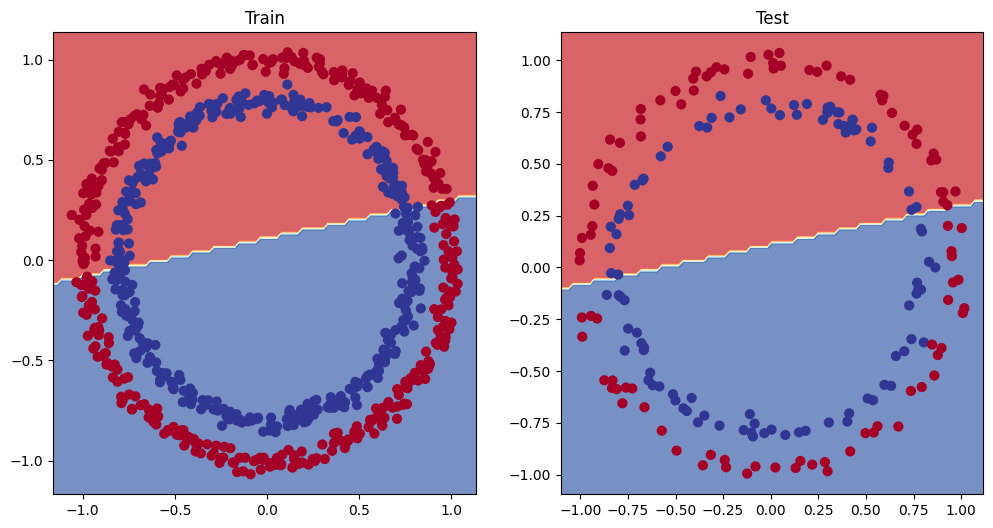

In [734]:
plotting_prediction(model_0)

In [742]:
## replace the model above with n.. sequential

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=1)

    def forward(self,x):
        return self.linear3(self.linear2(self.linear1(x)))


model_1 = CircleModelV2().to(device)
model_1.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('linear1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('linear2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [743]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [744]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [745]:
torch.cuda.manual_seed(42)
torch.manual_seed(42)
epochs = 100
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,y_train)

    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    ## testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    
    if epoch % 20 == 0:
        print(f"Epoch : {epoch} Loss : {loss:.5f} Accuracy : {acc:.2f}| Test loss : {test_loss:.5f} Test acc : {test_acc:.2f}")
    


    

Epoch : 0 Loss : 0.69396 Accuracy : 50.88| Test loss : 0.69261 Test acc : 51.00
Epoch : 20 Loss : 0.69396 Accuracy : 50.88| Test loss : 0.69261 Test acc : 51.00
Epoch : 40 Loss : 0.69396 Accuracy : 50.88| Test loss : 0.69261 Test acc : 51.00
Epoch : 60 Loss : 0.69396 Accuracy : 50.88| Test loss : 0.69261 Test acc : 51.00
Epoch : 80 Loss : 0.69396 Accuracy : 50.88| Test loss : 0.69261 Test acc : 51.00


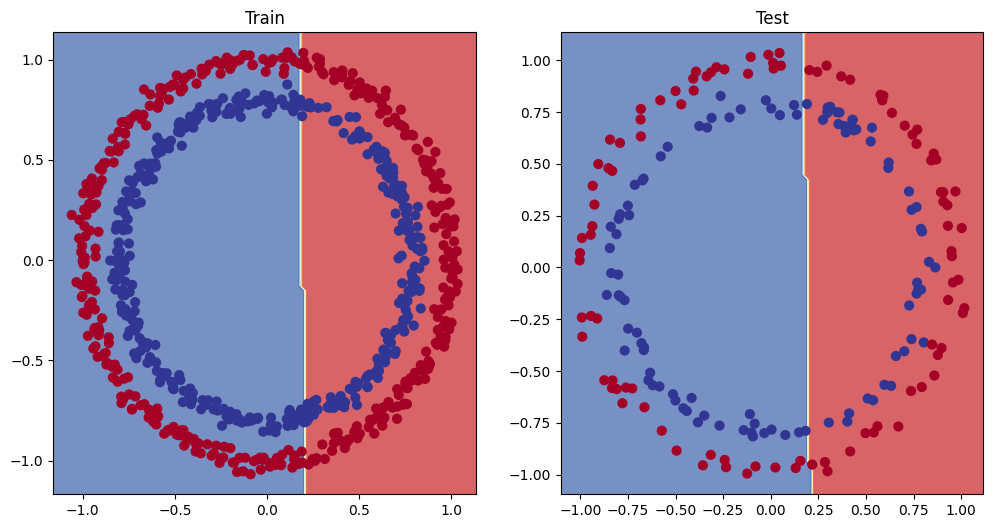

In [746]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

TypeError: plot_decision_boundary() missing 2 required positional arguments: 'X' and 'y'

In [747]:
next(model_1.parameters()).device

device(type='cpu')